# I did both parts of option 3. After the tutorial I answer the questions, and then I explore different ways to change the model.

# Neural net painter

This notebook demonstrates a fun experiment in training a neural network to do regression from the color (r,g,b) of a pixel in an image, given its (x,y) position in the image. It's mostly useless, but gives a nice visual intuition for regression. This notebook is inspired by the same example in [convnet.js](https://cs.stanford.edu/people/karpathy/convnetjs/demo/image_regression.html) and the first part of this notebook is mostly reimplementing it in Keras instead. Later, we'll have some fun interpolating different image models.

First make sure the following import statements work.

In [1]:
%matplotlib inline
import time
from PIL import Image
import numpy as np
import keras
from matplotlib.pyplot import imshow, figure
from keras.models import Sequential
from keras.layers import Dense

First we'll open an image, and create a helper function that converts that image into a training set of `(x,y)` positions (the data) and their corresponding `(r,g,b)` colors (the labels). We'll then load a picture with it.

data [[0.         0.        ]
 [0.00333333 0.        ]
 [0.00666667 0.        ]
 ...
 [0.99       0.99666667]
 [0.99333333 0.99666667]
 [0.99666667 0.99666667]]
labels [[ 81  93  55]
 [ 83  95  57]
 [ 83  95  57]
 ...
 [103 110  56]
 [102 111  56]
 [105 114  57]]


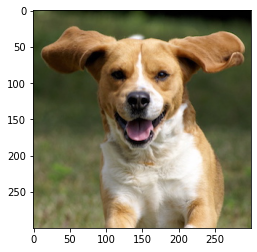

In [3]:
def get_data(img):
    width, height = img.size
    pixels = img.getdata()
    x_data, y_data = [],[]
    for y in range(height):
        for x in range(width):
            idx = x + y * width
            r, g, b = pixels[idx]
            x_data.append([x / float(width), y / float(height)])
            y_data.append([r, g, b])
    x_data = np.array(x_data)
    y_data = np.array(y_data)
    return x_data, y_data

im1 = Image.open("./dog.jpg")
x1, y1 = get_data(im1)

print("data", x1)
print("labels", y1)
imshow(im1)

We've postfixed all the variable names with a `1` because later we'll open a second image.

We're now going to define a neural network which takes a 2-neuron input (the normalized x, y position) and outputs a 3-neuron output corresponding to color. We'll use Keras's `Sequential` class to create a deep neural network with a bunch of 20-neuron fully-connected layers with ReLU activations. Our loss function will be a mean_squared_error between the predicted colors and the actual ones from the image.

Once we've defined that model, we'll create a neural network `m1` with that architecture.

In [4]:
def make_model():
    model = Sequential()
    model.add(Dense(2, activation='relu', input_shape=(2,)))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(3))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

m1 = make_model()

Let's now go ahead and train our neural network. In this case, we are going to use the training set as the validation set as well. Normally, you'd never do this because it would cause your neural network to overfit. But in this experiment, we're not worried about overfitting... in fact, overfitting is the whole point! 

We train for 25 epochs and have a batch size of 5.

In [5]:
m1.fit(x1, y1, batch_size=5, epochs=25, verbose=1, validation_data=(x1, y1))

Epoch 1/25
18000/18000 [==============================] - 17s 928us/step - loss: 1952.2611 - val_loss: 1587.6097
Epoch 2/25
18000/18000 [==============================] - 17s 931us/step - loss: 996.3463 - val_loss: 759.1231
Epoch 3/25
18000/18000 [==============================] - 17s 944us/step - loss: 794.9646 - val_loss: 786.1486
Epoch 4/25
18000/18000 [==============================] - 16s 915us/step - loss: 738.0060 - val_loss: 699.7255
Epoch 5/25
18000/18000 [==============================] - 17s 925us/step - loss: 690.5921 - val_loss: 639.2047
Epoch 6/25
18000/18000 [==============================] - 17s 961us/step - loss: 654.8725 - val_loss: 640.1440
Epoch 7/25
18000/18000 [==============================] - 17s 952us/step - loss: 621.6915 - val_loss: 736.7941
Epoch 8/25
18000/18000 [==============================] - 17s 933us/step - loss: 599.6616 - val_loss: 501.0490
Epoch 9/25
18000/18000 [==============================] - 17s 948us/step - loss: 568.9690 - val_loss: 557.6665

Now that the neural net is finished training, let's take the training data, our pixel positions, and simply send them back straight through the network, and plot the predicted colors on a new image. We'll make a new function for this called `generate_image`. 

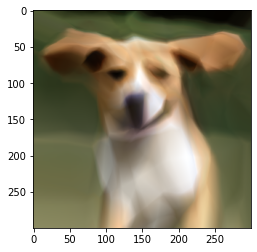

In [6]:
def generate_image(model, x, width, height):
    img = Image.new("RGB", [width, height])
    pixels = img.load()
    y_pred = model.predict(x)
    for y in range(height):
        for x in range(width):
            idx = x + y * width
            r, g, b = y_pred[idx]
            pixels[x, y] = (int(r), int(g), int(b))
    return img

img = generate_image(m1, x1, im1.width, im1.height)
imshow(img)

Sort of looks like the original image a bit! Of course the network can't learn the mapping perfectly without pretty much memorizing the data, but this way gives us a pretty good impression and doubles as an extremely inefficient form of compression!

Let's load another image. We'll load the second image and also resize it so that it's the same size as the first image.

data [[0.         0.        ]
 [0.00333333 0.        ]
 [0.00666667 0.        ]
 ...
 [0.99       0.99666667]
 [0.99333333 0.99666667]
 [0.99666667 0.99666667]]
labels [[ 37  68  36]
 [ 38  69  36]
 [ 37  68  34]
 ...
 [159 150 132]
 [173 164 148]
 [191 181 168]]


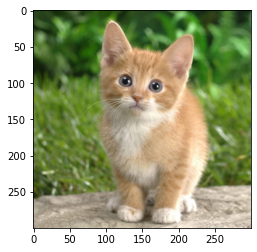

In [7]:
im2 = Image.open("./kitty.jpg")
im2 = im2.resize(im1.size)
x2, y2 = get_data(im2)

print("data", x2)
print("labels", y2)
imshow(im2)

Now we'll repeat the experiment from before. We'll make a new neural network `m2` which will learn to map `im2`'s (x,y) positions to its (r,g,b) colors.

In [13]:
m2 = make_model()   # make a new model, keep m1 separate
m2.fit(x2, y2, batch_size=5, epochs=25, verbose=1, validation_data=(x2, y2))

Epoch 1/25
18000/18000 [==============================] - 17s 925us/step - loss: 2080.2927 - val_loss: 1665.2510
Epoch 2/25
18000/18000 [==============================] - 16s 906us/step - loss: 1663.6821 - val_loss: 1506.0951
Epoch 3/25
18000/18000 [==============================] - 16s 910us/step - loss: 1522.2922 - val_loss: 1467.7333
Epoch 4/25
18000/18000 [==============================] - 16s 914us/step - loss: 1469.2507 - val_loss: 1478.9100
Epoch 5/25
18000/18000 [==============================] - 16s 914us/step - loss: 1390.8325 - val_loss: 1377.2095
Epoch 6/25
18000/18000 [==============================] - 16s 909us/step - loss: 1327.2435 - val_loss: 1227.6947
Epoch 7/25
18000/18000 [==============================] - 17s 924us/step - loss: 1209.1180 - val_loss: 1240.6793
Epoch 8/25
18000/18000 [==============================] - 17s 942us/step - loss: 1116.8605 - val_loss: 1030.2781
Epoch 9/25
18000/18000 [==============================] - 17s 919us/step - loss: 1078.0155 - val

Let's generate a new image from `m2` and see how it looks.

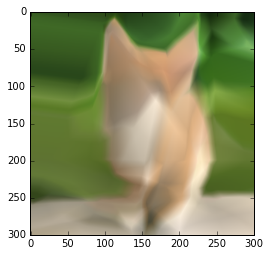

In [154]:
img = generate_image(m2, x2, im2.width, im2.height)
imshow(img)

## Original image from model above

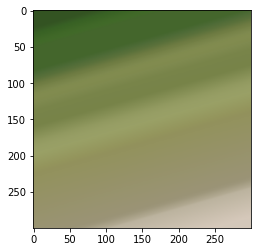

In [10]:
img = generate_image(m2, x2, im2.width, im2.height)
imshow(img)

## This is the new one and honestly I think it would be best if I retrained it. I also noticed the loss was 2000, pretty high. The original model had a loss of only 500, so I think the initial weights were just bad for this one.

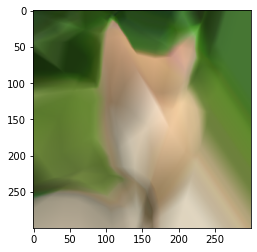

In [14]:
img = generate_image(m2, x2, im2.width, im2.height)
imshow(img)

## There we go. After running it a fourth time I got a decent loss of 822, which as we can see creates a decent image.

Not too bad!

Now let's do something funky. We're going to make a new neural network, `m3`, with the same architecture as `m1` and `m2` but instead of training it, we'll just set its weights to be interpolations between the weights of `m1` and `m2` and at each step, we'll generate a new image. In other words, we'll gradually change the model learned from the first image into the model learned from the second image, and see what kind of an image it outputs at each step.

To help us do this, we'll create a function `get_interpolated_weights` and we'll make one change to our image generation function: instead of just coloring the pixels to be the exact outputs, we'll auto-normalize every frame by rescaling the minimum and maximum output color to 0 to 255. This is because sometimes the intermediate models output in different ranges than what `m1` and `m2` were trained to. Yeah, this is a bit of a hack, but it works!

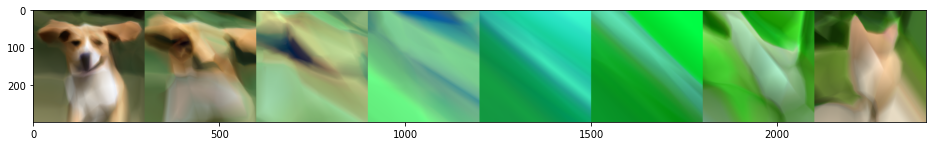

In [15]:
def get_interpolated_weights(model1, model2, amt):
    w1 = np.array(model1.get_weights())
    w2 = np.array(model2.get_weights())
    w3 = np.add((1.0 - amt) * w1, amt * w2)
    return w3

def generate_image_rescaled(model, x, width, height):
    img = Image.new("RGB", [width, height])
    pixels = img.load()
    y_pred = model.predict(x)
    y_pred = 255.0 * (y_pred - np.min(y_pred)) / (np.max(y_pred) - np.min(y_pred))  # rescale y_pred
    for y in range(height):
        for x in range(width):
            idx = x + y * width
            r, g, b = y_pred[idx]
            pixels[x, y] = (int(r), int(g), int(b))
    return img


# make new model to hold interpolated weights
m3 = make_model()

# we'll do 8 frames and stitch the images together at the end
n = 8
interpolated_images = []
for i in range(n):
    amt = float(i)/(n-1.0)
    w3 = get_interpolated_weights(m1, m2, amt)
    m3.set_weights(w3)
    img = generate_image_rescaled(m3, x1, im1.width, im1.height)
    interpolated_images.append(img)

full_image = np.concatenate(interpolated_images, axis=1)
figure(figsize=(16,4))
imshow(full_image)

Neat... Let's do one last thing, and make an animation with more frames. We'll generate 120 frames inside the assets folder, then use `ffmpeg` to stitch them into an mp4 file. If you don't have ffmpeg, you can install it from [here](https://ffmpeg.org/).

In [17]:
n = 120
frames_dir = './neural-painter-frames'
video_path = './neural-painter-interpolation.mp4'

import os
if not os.path.isdir(frames_dir):
    os.makedirs(frames_dir)

for i in range(n):
    amt = float(i)/(n-1.0)
    w3 = get_interpolated_weights(m1, m2, amt)
    m3.set_weights(w3)
    img = generate_image_rescaled(m3, x1, im1.width, im1.height)
    img.save('./neural-painter-frames/frame%04d.png'%i)

cmd = 'ffmpeg -i %s/frame%%04d.png -c:v libx264 -pix_fmt yuv420p %s' % (frames_dir, video_path)
os.system(cmd)

0

## Old Interpolation as GIF

You can find the video now in the assets directory. Looks neat! We can also display it in this notebook. From here, there's a lot of fun things we can do... Triangulating between multiple images, or streaming together several interpolations, or predicting color from not just position, but time in a movie. Lots of possibilities. 

![dogcat](./dog-cat-interp.gif)

## New Interpolation as Video

In [21]:
from IPython.display import HTML
import io
import base64

video = io.open(video_path, 'r+b').read()
encoded = base64.b64encode(video)

HTML(data='''<video alt="test" controls>
     <source src="data:video/mp4;base64,{0}" type="video/mp4" />
     </video>'''.format(encoded.decode('ascii')))

# Question Answers

1. What type of data are they using?
    - The input data is x,y value pairs.
2. What conversions (if any) had to be done to the data before it could be put into the neural network?
    - To make the data usable, they first had to go pixel by pixel and extract the actual rgb values into a list so it could be processed by the model. This is done in the get_data function.
3. What is the output of the neural network, both in terms of what it looks like to the computer (e.g. integers in the range [0-2]) and how humans should interpret it (e.g. the type of iris)?
    - The output of the model is 3 values between 0 and 256, which should be interpreted as the rgb values for a pixel at the xy position specified in the input.
4. How many hidden layers does the network have, and what type are they (e.g. fully connected, convolutional, recurrent, LSTM, sparse, etc.)?
    - 7 hidden fully connected layers
5. What activation function(s) does it use?
    - This model uses the ReLU function
6. What loss or cost function is it using?
    - This model uses Adam
7. What kind of validation (if any) are they using?
    - Loss, which in this case is calculated using mean squared error
8. What other validation methods might work for this type of problem?
    - I don't know. This is a very particular kind of neural network whose purpose is very basic and I'm not sure there is any point in another validation method.
9. Why do you think the authors may have chosen this architecture for their network?
    - For illustration purposes
10. Are there any changes you might try, if you were going to improve on their model?
    - One way to improve the model would be to provide more nodes per layer in order to allow for a finer and more accurate result.

# Training Model on Image of Panda

data [[0.         0.        ]
 [0.00333333 0.        ]
 [0.00666667 0.        ]
 ...
 [0.99       0.99666667]
 [0.99333333 0.99666667]
 [0.99666667 0.99666667]]
labels [[ 95  79  75]
 [ 93  79  70]
 [ 92  77  70]
 ...
 [ 89 118  81]
 [104 130  94]
 [ 98 123  82]]


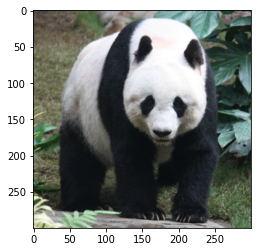

In [35]:
im3 = Image.open("./Grosser_Panda.jpeg")
im3 = im3.resize(im1.size)
x3, y3 = get_data(im3)

print("data", x3)
print("labels", y3)
imshow(im3)

In [37]:
m3 = make_model()   # make a new model, keep m1 separate
m3.fit(x3, y3, batch_size=5, epochs=25, verbose=1, validation_data=(x3, y3))

Epoch 1/25
18000/18000 [==============================] - 16s 910us/step - loss: 4326.0562 - val_loss: 3253.7910
Epoch 2/25
18000/18000 [==============================] - 16s 907us/step - loss: 3006.2102 - val_loss: 2730.0757
Epoch 3/25
18000/18000 [==============================] - 16s 894us/step - loss: 2596.2195 - val_loss: 2114.4080
Epoch 4/25
18000/18000 [==============================] - 16s 910us/step - loss: 2037.9041 - val_loss: 1865.9602
Epoch 5/25
18000/18000 [==============================] - 16s 902us/step - loss: 1648.4204 - val_loss: 1461.3087
Epoch 6/25
18000/18000 [==============================] - 16s 898us/step - loss: 1434.1565 - val_loss: 1297.9113
Epoch 7/25
18000/18000 [==============================] - 16s 893us/step - loss: 1344.3464 - val_loss: 1122.0076
Epoch 8/25
18000/18000 [==============================] - 16s 900us/step - loss: 1267.2966 - val_loss: 1355.5596
Epoch 9/25
18000/18000 [==============================] - 16s 906us/step - loss: 1204.1061 - val

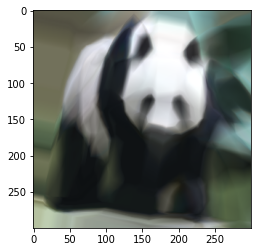

In [38]:
img = generate_image(m3, x3, im3.width, im3.height)
imshow(img)

### For a loss of 780, after only two tries, with a pretty complex image, I'd say this is a really good result.

# \*\*From this point on, I'm experimenting with creating different types of models\*\*

# Changing Model to Train on Indices

data [[0.00000000e+00]
 [3.33333333e-03]
 [6.66666667e-03]
 ...
 [2.99990000e+02]
 [2.99993333e+02]
 [2.99996667e+02]]
labels [[ 81  93  55]
 [ 83  95  57]
 [ 83  95  57]
 ...
 [103 110  56]
 [102 111  56]
 [105 114  57]]


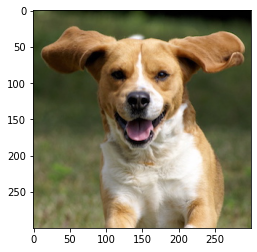

In [39]:
def get_index_data(img):
    width, height = img.size
    pixels = img.getdata()
    x_data, y_data = [],[]
    for y in range(height):
        for x in range(width):
            idx = x + y * width
            r, g, b = pixels[idx]
            x_data.append([idx / float(height)])
            y_data.append([r, g, b])
    x_data = np.array(x_data)
    y_data = np.array(y_data)
    return x_data, y_data

im4 = Image.open("./dog.jpg")
x4, y4 = get_index_data(im1)

print("data", x4)
print("labels", y4)
imshow(im4)

In [40]:
def make_index_model():
    model = Sequential()
    model.add(Dense(1, activation='relu', input_shape=(1,)))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(3))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

m4 = make_index_model()

In [49]:
m4.fit(x4, y4, batch_size=5, epochs=25, verbose=1, validation_data=(x4, y4))

Epoch 1/25
18000/18000 [==============================] - 16s 909us/step - loss: 2846.9463 - val_loss: 2813.8179
Epoch 2/25
18000/18000 [==============================] - 16s 911us/step - loss: 2738.3606 - val_loss: 2717.3386
Epoch 3/25
18000/18000 [==============================] - 16s 905us/step - loss: 2714.2131 - val_loss: 2741.8787
Epoch 4/25
18000/18000 [==============================] - 16s 901us/step - loss: 2704.2056 - val_loss: 2668.9170
Epoch 5/25
18000/18000 [==============================] - 16s 911us/step - loss: 2702.2900 - val_loss: 2680.5728
Epoch 6/25
18000/18000 [==============================] - 17s 917us/step - loss: 2700.2336 - val_loss: 2667.4583
Epoch 7/25
18000/18000 [==============================] - 16s 916us/step - loss: 2696.9751 - val_loss: 2659.0049
Epoch 8/25
18000/18000 [==============================] - 16s 906us/step - loss: 2695.8938 - val_loss: 2692.9873
Epoch 9/25
18000/18000 [==============================] - 16s 907us/step - loss: 2693.9585 - val

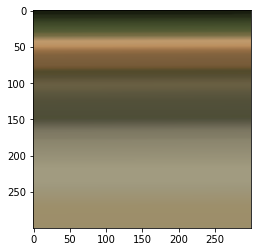

In [45]:
img = generate_image(m4, x4, im4.width, im4.height)
imshow(img)

In [48]:
weights = m4.get_weights()
weights = [np.random.permutation(w.flat).reshape(w.shape) for w in weights]
m4.set_weights(weights)

### Overall there should be higher loss because the model has less info to go off of. At the same time I don't think it should matter that much because you can get the xy values from the index if you know the width. For this structure, even after re-initializing the weights it seemed to be going nowhere, so I'm going to try a different approach...

In [52]:
def make_shallow_model():
    model = Sequential()
    model.add(Dense(1, activation='relu', input_shape=(1,)))
    model.add(Dense(300, activation='relu'))
    model.add(Dense(300, activation='relu'))
    model.add(Dense(300, activation='relu'))
    model.add(Dense(3))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

m5 = make_shallow_model()

In [53]:
m5.fit(x4, y4, batch_size=5, epochs=25, verbose=1, validation_data=(x4, y4))

Epoch 1/25
18000/18000 [==============================] - 23s 1ms/step - loss: 3056.4971 - val_loss: 2873.0156
Epoch 2/25
18000/18000 [==============================] - 23s 1ms/step - loss: 2879.3833 - val_loss: 2816.4758
Epoch 3/25
18000/18000 [==============================] - 23s 1ms/step - loss: 2851.7473 - val_loss: 2876.9392
Epoch 4/25
18000/18000 [==============================] - 23s 1ms/step - loss: 2789.1365 - val_loss: 2725.6599
Epoch 5/25
18000/18000 [==============================] - 23s 1ms/step - loss: 2733.4705 - val_loss: 2681.1921
Epoch 6/25
18000/18000 [==============================] - 23s 1ms/step - loss: 2714.9312 - val_loss: 2753.8572
Epoch 7/25
18000/18000 [==============================] - 23s 1ms/step - loss: 2706.5078 - val_loss: 2676.8066
Epoch 8/25
18000/18000 [==============================] - 23s 1ms/step - loss: 2700.8799 - val_loss: 2707.5315
Epoch 9/25
18000/18000 [==============================] - 23s 1ms/step - loss: 2700.0723 - val_loss: 2796.0378
E

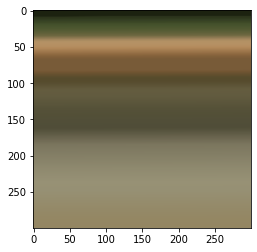

In [54]:
img = generate_image(m5, x4, im4.width, im4.height)
imshow(img)

### The shallower model got about the same results. It seems going for breadth over depth doesn't really work either. Maybe I'm underestimating how much information was lost when converting from xy values to indices.

# Creating Neural Net to Take RGB Values to XY Values

### I'm not expecting too much from this because unlike xy values and indices which only have one corresponding pixel, rgb values could have multiple corresponding xy values. This could lead to lots of error. Here I check how many of these repeating rgb values exist in the image.

In [58]:
y4_list = y4.tolist()
y4_list = [tuple(l) for l in y4_list]
seen = set()
for x in y4_list:
    if x in seen: print(x)
    seen.add(x)

(83, 95, 57)
(87, 99, 59)
(81, 93, 55)
(51, 62, 32)
(48, 59, 29)
(38, 51, 23)
(28, 38, 14)
(28, 38, 14)
(28, 38, 14)
(29, 39, 15)
(28, 38, 14)
(28, 38, 14)
(28, 38, 14)
(29, 39, 15)
(29, 39, 15)
(28, 38, 14)
(27, 37, 13)
(26, 35, 14)
(26, 35, 14)
(26, 35, 14)
(11, 17, 3)
(16, 19, 8)
(16, 19, 8)
(12, 15, 4)
(11, 14, 5)
(11, 14, 5)
(11, 14, 5)
(12, 15, 4)
(15, 18, 7)
(19, 26, 10)
(18, 27, 10)
(17, 28, 11)
(12, 25, 8)
(12, 25, 8)
(12, 25, 8)
(11, 19, 6)
(14, 20, 8)
(11, 17, 7)
(11, 17, 7)
(9, 15, 5)
(9, 14, 7)
(19, 28, 9)
(34, 52, 12)
(11, 17, 3)
(11, 14, 3)
(4, 4, 2)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(2, 2, 2)
(2, 2, 2)
(1, 1, 1)
(1, 1, 1)
(1, 1, 3)
(1, 1, 3)
(3, 3, 3)
(1, 1, 1)
(1, 1, 1)
(1, 1, 3)
(1, 1, 3)
(1, 1, 3)
(2, 0, 3)
(1, 1, 3)
(1, 1, 3)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(0, 2, 1)
(0, 2, 1)
(0, 2, 1)
(0, 2, 1)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0

(39, 52, 22)
(43, 57, 24)
(45, 59, 26)
(47, 61, 26)
(57, 73, 34)
(65, 82, 37)
(62, 79, 34)
(56, 73, 29)
(34, 47, 17)
(25, 35, 11)
(22, 32, 8)
(15, 19, 5)
(15, 19, 5)
(13, 19, 5)
(13, 19, 5)
(13, 19, 5)
(13, 19, 5)
(16, 22, 8)
(14, 22, 9)
(15, 23, 10)
(16, 24, 11)
(16, 24, 11)
(16, 24, 11)
(16, 24, 11)
(15, 23, 10)
(15, 23, 10)
(16, 24, 11)
(11, 17, 7)
(8, 13, 6)
(9, 14, 7)
(9, 12, 5)
(9, 11, 6)
(8, 10, 5)
(8, 10, 5)
(6, 8, 3)
(6, 8, 3)
(5, 7, 2)
(5, 7, 2)
(5, 5, 3)
(4, 4, 2)
(3, 5, 2)
(3, 5, 2)
(3, 5, 2)
(3, 5, 2)
(4, 6, 3)
(4, 6, 3)
(5, 7, 4)
(4, 6, 3)
(4, 6, 3)
(5, 7, 4)
(7, 9, 6)
(7, 9, 6)
(7, 9, 6)
(5, 7, 4)
(7, 9, 6)
(7, 9, 6)
(6, 8, 5)
(6, 8, 5)
(6, 8, 5)
(5, 7, 4)
(5, 7, 4)
(5, 7, 4)
(4, 6, 3)
(5, 7, 4)
(5, 7, 4)
(6, 8, 5)
(6, 8, 5)
(5, 7, 4)
(5, 7, 4)
(4, 6, 3)
(6, 6, 4)
(6, 6, 4)
(6, 6, 4)
(7, 7, 5)
(7, 7, 5)
(6, 6, 4)
(6, 6, 6)
(5, 5, 5)
(3, 3, 3)
(3, 3, 3)
(3, 3, 3)
(2, 2, 2)
(2, 2, 2)
(2, 2, 2)
(2, 2, 2)
(2, 2, 2)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)
(1, 1, 1)


(77, 82, 50)
(77, 82, 50)
(77, 82, 50)
(77, 82, 50)
(77, 82, 50)
(78, 84, 50)
(78, 84, 50)
(79, 85, 51)
(80, 86, 52)
(80, 86, 50)
(80, 86, 50)
(81, 87, 51)
(82, 88, 52)
(86, 90, 53)
(87, 91, 54)
(87, 91, 54)
(87, 91, 54)
(87, 91, 54)
(88, 92, 55)
(87, 91, 56)
(88, 92, 57)
(86, 92, 56)
(84, 90, 54)
(83, 89, 55)
(82, 89, 55)
(80, 87, 53)
(76, 86, 51)
(75, 85, 50)
(73, 83, 48)
(73, 83, 48)
(74, 84, 49)
(75, 85, 50)
(76, 86, 49)
(76, 86, 49)
(77, 87, 50)
(76, 86, 49)
(77, 88, 48)
(79, 90, 50)
(80, 91, 51)
(79, 90, 50)
(79, 90, 50)
(78, 89, 49)
(79, 90, 50)
(79, 90, 50)
(80, 91, 51)
(80, 91, 51)
(79, 90, 48)
(78, 89, 47)
(78, 89, 47)
(79, 90, 47)
(80, 91, 48)
(80, 91, 48)
(80, 91, 48)
(80, 91, 48)
(85, 97, 51)
(85, 97, 51)
(84, 96, 50)
(83, 95, 49)
(86, 97, 54)
(84, 95, 53)
(81, 89, 50)
(80, 88, 49)
(80, 88, 49)
(80, 88, 49)
(76, 88, 48)
(74, 86, 46)
(73, 85, 45)
(73, 85, 45)
(74, 86, 46)
(74, 86, 46)
(72, 87, 46)
(72, 87, 46)
(74, 89, 48)
(74, 89, 48)
(73, 88, 47)
(73, 88, 47)
(74, 89, 48)

(90, 106, 57)
(88, 104, 55)
(88, 104, 55)
(85, 103, 55)
(85, 103, 55)
(84, 101, 56)
(80, 97, 52)
(77, 92, 49)
(78, 93, 50)
(79, 94, 51)
(77, 92, 51)
(75, 90, 49)
(75, 90, 49)
(74, 89, 48)
(73, 88, 47)
(72, 87, 48)
(72, 87, 48)
(72, 86, 50)
(72, 86, 50)
(69, 83, 47)
(68, 82, 46)
(68, 82, 46)
(67, 81, 46)
(66, 80, 45)
(65, 79, 44)
(65, 79, 46)
(62, 77, 46)
(62, 77, 46)
(62, 77, 46)
(64, 79, 48)
(64, 79, 48)
(64, 79, 48)
(63, 78, 47)
(64, 79, 48)
(64, 79, 48)
(63, 78, 47)
(62, 77, 46)
(63, 78, 47)
(60, 75, 46)
(58, 73, 44)
(58, 73, 44)
(55, 68, 42)
(55, 68, 40)
(54, 67, 39)
(53, 66, 38)
(53, 66, 38)
(54, 67, 39)
(51, 64, 36)
(51, 64, 36)
(50, 63, 37)
(48, 61, 35)
(47, 60, 34)
(45, 58, 32)
(43, 56, 30)
(42, 55, 29)
(43, 53, 28)
(44, 54, 29)
(45, 55, 30)
(45, 55, 30)
(45, 53, 29)
(45, 53, 29)
(45, 53, 29)
(44, 52, 28)
(45, 53, 29)
(45, 53, 29)
(44, 52, 28)
(43, 53, 28)
(42, 52, 27)
(42, 52, 27)
(38, 51, 25)
(34, 47, 21)
(31, 43, 19)
(29, 41, 17)
(31, 41, 17)
(33, 43, 19)
(35, 43, 22)
(35, 4

(54, 67, 37)
(57, 66, 37)
(55, 66, 36)
(52, 66, 33)
(51, 65, 32)
(52, 63, 33)
(52, 61, 34)
(49, 59, 32)
(47, 57, 30)
(46, 56, 29)
(46, 56, 31)
(47, 57, 32)
(46, 56, 31)
(45, 55, 30)
(45, 55, 30)
(44, 54, 30)
(44, 54, 30)
(43, 53, 29)
(77, 88, 46)
(77, 88, 46)
(78, 89, 47)
(79, 90, 50)
(79, 90, 50)
(79, 90, 50)
(79, 90, 50)
(80, 91, 51)
(78, 89, 49)
(78, 88, 51)
(77, 87, 50)
(75, 85, 48)
(74, 84, 47)
(74, 84, 47)
(76, 83, 49)
(76, 83, 49)
(78, 84, 50)
(78, 84, 50)
(78, 84, 50)
(79, 85, 51)
(79, 85, 51)
(79, 85, 51)
(79, 85, 51)
(79, 85, 51)
(78, 84, 50)
(79, 86, 52)
(79, 86, 53)
(78, 85, 52)
(77, 84, 51)
(75, 85, 51)
(75, 85, 51)
(74, 84, 50)
(74, 81, 48)
(71, 81, 47)
(72, 82, 48)
(73, 83, 48)
(75, 85, 50)
(74, 84, 49)
(74, 84, 49)
(72, 84, 48)
(69, 81, 45)
(76, 86, 49)
(99, 94, 56)
(61, 82, 39)
(67, 86, 41)
(67, 84, 39)
(78, 93, 50)
(79, 91, 51)
(81, 92, 52)
(77, 85, 48)
(80, 88, 51)
(84, 90, 54)
(81, 88, 54)
(76, 83, 49)
(83, 90, 56)
(79, 90, 48)
(79, 90, 48)
(79, 90, 48)
(79, 90, 48)

(65, 80, 47)
(65, 76, 42)
(64, 75, 41)
(62, 73, 39)
(59, 73, 40)
(60, 74, 41)
(58, 72, 39)
(57, 71, 38)
(59, 73, 40)
(60, 71, 39)
(60, 71, 39)
(60, 71, 39)
(60, 71, 39)
(68, 84, 47)
(68, 84, 47)
(68, 84, 47)
(67, 83, 46)
(67, 83, 46)
(67, 83, 44)
(65, 81, 42)
(65, 81, 42)
(63, 79, 40)
(62, 78, 39)
(62, 78, 39)
(62, 78, 39)
(61, 77, 38)
(61, 77, 38)
(61, 77, 38)
(62, 78, 39)
(63, 79, 40)
(64, 80, 43)
(66, 82, 45)
(67, 83, 46)
(68, 84, 47)
(68, 84, 47)
(71, 87, 50)
(71, 85, 49)
(70, 84, 48)
(70, 84, 48)
(71, 85, 49)
(71, 86, 47)
(70, 85, 46)
(70, 85, 46)
(65, 81, 45)
(145, 102, 67)
(141, 92, 52)
(143, 97, 61)
(143, 97, 61)
(173, 126, 84)
(172, 123, 80)
(179, 130, 87)
(177, 130, 88)
(171, 125, 76)
(200, 152, 104)
(195, 144, 99)
(218, 171, 129)
(85, 94, 49)
(79, 90, 47)
(85, 98, 55)
(79, 89, 52)
(74, 84, 47)
(72, 82, 47)
(73, 83, 48)
(72, 82, 48)
(67, 77, 43)
(74, 84, 50)
(71, 81, 47)
(75, 85, 51)
(68, 78, 43)
(72, 82, 47)
(77, 84, 50)
(78, 86, 49)
(80, 88, 51)
(89, 95, 59)
(78, 84, 48)
(7

(177, 123, 63)
(186, 130, 83)
(212, 168, 123)
(74, 85, 45)
(71, 83, 47)
(70, 82, 46)
(68, 78, 43)
(68, 78, 43)
(65, 77, 39)
(46, 60, 24)
(46, 60, 24)
(45, 63, 25)
(48, 65, 29)
(54, 70, 34)
(51, 67, 31)
(57, 73, 36)
(99, 94, 56)
(190, 151, 112)
(186, 138, 90)
(147, 101, 52)
(159, 112, 66)
(166, 119, 73)
(163, 114, 71)
(158, 109, 66)
(133, 88, 49)
(138, 93, 52)
(127, 81, 45)
(129, 85, 50)
(131, 85, 49)
(142, 94, 54)
(160, 112, 72)
(184, 136, 96)
(190, 142, 102)
(196, 148, 108)
(194, 149, 107)
(194, 149, 107)
(195, 144, 99)
(186, 132, 85)
(184, 131, 79)
(176, 121, 67)
(170, 111, 55)
(161, 99, 42)
(209, 163, 113)
(213, 170, 117)
(215, 169, 117)
(212, 162, 109)
(230, 183, 129)
(226, 180, 128)
(226, 185, 131)
(235, 199, 147)
(238, 202, 150)
(234, 198, 146)
(230, 192, 143)
(239, 206, 155)
(242, 208, 160)
(246, 212, 164)
(239, 205, 157)
(237, 205, 156)
(246, 214, 167)
(252, 218, 172)
(245, 209, 161)
(249, 213, 165)
(240, 202, 155)
(238, 201, 149)
(231, 188, 135)
(235, 198, 146)
(236, 199, 147)

(58, 34, 10)
(65, 39, 14)
(82, 52, 24)
(74, 44, 18)
(72, 46, 23)
(6, 2, 3)
(4, 2, 3)
(3, 1, 2)
(2, 0, 3)
(2, 2, 4)
(2, 2, 4)
(1, 1, 3)
(1, 1, 3)
(2, 0, 3)
(4, 0, 1)
(4, 0, 0)
(17, 9, 6)
(35, 17, 3)
(51, 29, 8)
(67, 39, 15)
(197, 156, 104)
(230, 192, 143)
(229, 193, 145)
(232, 195, 150)
(238, 204, 159)
(237, 203, 158)
(232, 198, 152)
(236, 199, 154)
(236, 200, 150)
(229, 192, 139)
(234, 192, 134)
(231, 186, 127)
(231, 185, 126)
(222, 175, 119)
(221, 172, 114)
(228, 179, 120)
(224, 175, 117)
(221, 170, 115)
(209, 160, 104)
(222, 176, 117)
(218, 173, 116)
(214, 169, 112)
(217, 172, 117)
(218, 175, 122)
(225, 183, 133)
(240, 200, 151)
(238, 200, 151)
(233, 195, 146)
(240, 203, 151)
(238, 201, 149)
(237, 200, 148)
(234, 197, 145)
(230, 193, 141)
(233, 196, 144)
(235, 198, 146)
(243, 206, 154)
(240, 204, 152)
(231, 198, 147)
(232, 198, 150)
(246, 208, 161)
(243, 203, 152)
(238, 197, 145)
(230, 189, 133)
(229, 187, 129)
(188, 133, 77)
(185, 128, 73)
(111, 57, 19)
(195, 137, 89)
(198, 140, 90)

(212, 163, 120)
(218, 167, 122)
(216, 165, 120)
(212, 159, 115)
(211, 157, 113)
(210, 156, 109)
(214, 162, 114)
(210, 158, 110)
(136, 91, 49)
(140, 97, 55)
(99, 60, 29)
(70, 71, 37)
(72, 76, 43)
(67, 75, 38)
(67, 75, 38)
(66, 74, 37)
(65, 75, 38)
(66, 76, 39)
(66, 76, 39)
(67, 77, 40)
(68, 78, 43)
(68, 75, 41)
(67, 74, 40)
(69, 76, 42)
(50, 61, 31)
(49, 60, 30)
(49, 60, 30)
(50, 61, 31)
(51, 62, 32)
(51, 62, 32)
(51, 62, 32)
(50, 61, 31)
(52, 62, 35)
(53, 62, 35)
(53, 62, 35)
(53, 62, 35)
(53, 62, 35)
(52, 61, 34)
(51, 60, 33)
(51, 60, 33)
(51, 61, 34)
(48, 57, 30)
(53, 31, 7)
(52, 28, 4)
(48, 23, 1)
(48, 23, 3)
(46, 23, 5)
(45, 22, 4)
(42, 21, 4)
(41, 20, 3)
(37, 18, 3)
(37, 18, 3)
(38, 19, 4)
(38, 19, 4)
(38, 19, 2)
(38, 19, 2)
(41, 20, 3)
(41, 20, 3)
(43, 22, 5)
(42, 21, 4)
(41, 20, 3)
(44, 21, 3)
(44, 22, 1)
(45, 23, 2)
(48, 26, 3)
(51, 29, 6)
(51, 29, 5)
(50, 28, 4)
(50, 29, 2)
(51, 30, 1)
(57, 34, 3)
(59, 36, 4)
(58, 35, 4)
(59, 35, 7)
(69, 41, 17)
(53, 27, 4)
(52, 27, 5)
(40, 21

(60, 71, 39)
(59, 70, 36)
(59, 69, 35)
(58, 68, 34)
(58, 68, 34)
(60, 70, 36)
(60, 70, 36)
(61, 71, 37)
(61, 71, 37)
(62, 72, 38)
(46, 59, 31)
(44, 57, 29)
(44, 57, 29)
(45, 58, 30)
(44, 57, 29)
(43, 56, 28)
(45, 56, 26)
(46, 57, 27)
(46, 57, 27)
(46, 57, 27)
(45, 56, 26)
(45, 56, 26)
(46, 57, 27)
(46, 57, 27)
(44, 57, 27)
(44, 57, 27)
(47, 56, 27)
(49, 58, 29)
(48, 59, 29)
(47, 58, 28)
(45, 58, 28)
(47, 60, 32)
(50, 60, 33)
(50, 59, 32)
(52, 58, 32)
(50, 55, 32)
(48, 58, 33)
(48, 58, 33)
(52, 48, 21)
(55, 45, 18)
(51, 44, 16)
(49, 42, 14)
(47, 42, 13)
(49, 44, 15)
(53, 49, 20)
(48, 57, 26)
(46, 57, 27)
(46, 57, 27)
(46, 57, 27)
(47, 56, 27)
(48, 58, 24)
(45, 57, 21)
(50, 57, 24)
(48, 57, 28)
(47, 60, 32)
(47, 61, 35)
(45, 58, 30)
(56, 65, 34)
(51, 29, 6)
(46, 25, 4)
(47, 26, 7)
(49, 26, 8)
(48, 26, 5)
(46, 21, 0)
(47, 25, 2)
(52, 30, 6)
(57, 37, 12)
(59, 35, 7)
(106, 72, 37)
(93, 63, 37)
(80, 50, 22)
(69, 43, 20)
(52, 30, 16)
(26, 11, 4)
(8, 0, 0)
(1, 0, 0)
(6, 7, 2)
(8, 8, 6)
(3, 1, 

(63, 72, 41)
(64, 74, 40)
(64, 74, 40)
(63, 73, 39)
(63, 73, 39)
(64, 74, 40)
(65, 75, 41)
(62, 72, 38)
(62, 72, 38)
(61, 71, 37)
(60, 70, 36)
(59, 70, 36)
(58, 69, 35)
(56, 67, 33)
(56, 67, 33)
(57, 68, 36)
(56, 67, 35)
(55, 66, 34)
(56, 67, 35)
(58, 67, 36)
(59, 68, 37)
(58, 67, 36)
(57, 66, 35)
(63, 69, 41)
(62, 69, 38)
(62, 69, 38)
(62, 69, 38)
(62, 69, 38)
(61, 68, 37)
(60, 67, 36)
(60, 67, 36)
(59, 66, 33)
(59, 66, 33)
(59, 66, 33)
(60, 67, 36)
(44, 57, 31)
(43, 56, 30)
(43, 56, 30)
(44, 57, 31)
(44, 57, 31)
(44, 57, 31)
(43, 56, 28)
(42, 55, 27)
(43, 56, 28)
(43, 56, 28)
(43, 56, 30)
(44, 57, 31)
(44, 57, 31)
(44, 57, 31)
(44, 57, 31)
(44, 57, 31)
(46, 56, 31)
(46, 56, 31)
(48, 58, 33)
(48, 58, 33)
(50, 58, 34)
(49, 57, 33)
(46, 54, 31)
(45, 53, 29)
(45, 53, 29)
(44, 52, 28)
(43, 51, 27)
(43, 51, 27)
(42, 50, 26)
(43, 52, 25)
(43, 52, 25)
(43, 52, 25)
(44, 53, 26)
(46, 52, 26)
(46, 52, 26)
(46, 52, 26)
(48, 54, 28)
(48, 54, 28)
(49, 55, 29)
(50, 56, 30)
(52, 58, 32)
(51, 60, 33)

(48, 56, 32)
(48, 56, 32)
(47, 55, 31)
(47, 55, 32)
(47, 55, 32)
(45, 53, 30)
(45, 53, 30)
(45, 53, 29)
(44, 52, 28)
(43, 53, 28)
(42, 52, 27)
(42, 52, 27)
(42, 52, 27)
(40, 48, 24)
(41, 49, 25)
(42, 50, 26)
(42, 50, 26)
(44, 49, 26)
(46, 51, 28)
(47, 52, 29)
(47, 52, 29)
(50, 55, 32)
(50, 55, 32)
(49, 54, 31)
(50, 55, 32)
(50, 59, 32)
(51, 60, 33)
(51, 60, 33)
(51, 60, 33)
(54, 60, 34)
(55, 61, 33)
(56, 62, 34)
(56, 62, 34)
(56, 62, 34)
(55, 61, 33)
(53, 60, 29)
(53, 60, 29)
(52, 59, 28)
(51, 58, 27)
(49, 58, 27)
(48, 57, 26)
(46, 57, 25)
(45, 56, 24)
(45, 56, 24)
(46, 57, 25)
(46, 57, 27)
(46, 57, 27)
(48, 57, 28)
(49, 58, 29)
(50, 59, 32)
(52, 61, 32)
(53, 62, 33)
(53, 64, 34)
(53, 64, 34)
(53, 64, 34)
(53, 64, 34)
(53, 64, 34)
(53, 64, 34)
(55, 64, 37)
(57, 66, 39)
(57, 66, 37)
(59, 65, 37)
(59, 65, 39)
(59, 63, 38)
(58, 63, 40)
(58, 63, 40)
(59, 65, 39)
(62, 66, 39)
(67, 66, 38)
(98, 71, 41)
(106, 72, 37)
(104, 71, 38)
(97, 64, 31)
(91, 60, 29)
(91, 62, 30)
(81, 54, 24)
(75, 50, 1

(46, 51, 28)
(47, 52, 29)
(49, 54, 31)
(47, 55, 31)
(46, 54, 30)
(45, 53, 29)
(45, 53, 29)
(44, 54, 27)
(44, 54, 27)
(44, 54, 27)
(43, 53, 26)
(44, 54, 27)
(45, 55, 28)
(46, 56, 29)
(46, 56, 29)
(46, 56, 29)
(47, 56, 29)
(48, 57, 30)
(48, 57, 30)
(49, 55, 29)
(49, 54, 31)
(50, 55, 32)
(50, 55, 32)
(50, 55, 32)
(52, 57, 34)
(50, 59, 32)
(51, 60, 33)
(53, 59, 33)
(53, 59, 33)
(54, 60, 34)
(54, 60, 34)
(56, 60, 35)
(53, 62, 31)
(52, 61, 30)
(52, 61, 30)
(52, 61, 30)
(53, 62, 31)
(53, 62, 31)
(54, 61, 30)
(53, 60, 29)
(53, 60, 29)
(52, 59, 28)
(50, 59, 30)
(50, 59, 30)
(50, 59, 30)
(49, 58, 29)
(49, 58, 29)
(49, 58, 29)
(49, 58, 29)
(50, 59, 30)
(51, 60, 31)
(51, 60, 31)
(51, 60, 31)
(51, 60, 29)
(52, 61, 30)
(52, 61, 30)
(53, 62, 31)
(53, 62, 31)
(53, 62, 33)
(53, 62, 33)
(55, 61, 33)
(55, 61, 33)
(56, 62, 34)
(56, 62, 34)
(54, 64, 37)
(53, 63, 36)
(54, 63, 36)
(53, 62, 35)
(55, 61, 35)
(54, 60, 34)
(55, 59, 34)
(57, 60, 33)
(97, 73, 45)
(98, 71, 41)
(100, 71, 37)
(96, 68, 31)
(97, 66, 35

(54, 63, 36)
(54, 63, 36)
(55, 64, 37)
(55, 64, 37)
(55, 64, 37)
(56, 65, 38)
(56, 65, 38)
(56, 65, 38)
(57, 66, 39)
(57, 66, 39)
(60, 66, 38)
(61, 67, 39)
(61, 67, 41)
(62, 66, 41)
(62, 66, 41)
(62, 66, 41)
(62, 66, 41)
(62, 66, 41)
(61, 65, 42)
(61, 65, 42)
(61, 65, 42)
(61, 65, 38)
(61, 65, 38)
(61, 65, 38)
(61, 65, 38)
(60, 64, 37)
(58, 65, 34)
(57, 64, 33)
(57, 64, 33)
(57, 64, 33)
(58, 65, 34)
(59, 66, 35)
(60, 67, 36)
(51, 59, 35)
(51, 59, 35)
(50, 58, 34)
(49, 57, 33)
(46, 56, 31)
(45, 55, 30)
(45, 55, 30)
(46, 56, 31)
(47, 57, 32)
(46, 56, 31)
(47, 55, 31)
(47, 55, 31)
(50, 55, 32)
(50, 55, 32)
(50, 54, 31)
(52, 56, 31)
(51, 57, 31)
(51, 57, 31)
(51, 57, 31)
(51, 57, 31)
(48, 57, 30)
(47, 56, 29)
(46, 55, 28)
(43, 53, 26)
(43, 54, 24)
(43, 54, 24)
(43, 54, 24)
(43, 54, 24)
(44, 55, 23)
(45, 56, 24)
(45, 56, 24)
(46, 55, 26)
(47, 56, 27)
(48, 57, 28)
(49, 58, 29)
(51, 57, 29)
(52, 58, 30)
(52, 58, 30)
(52, 58, 30)
(53, 57, 32)
(52, 58, 32)
(52, 58, 32)
(53, 59, 33)
(54, 60, 34)

(252, 251, 249)
(246, 240, 242)
(246, 235, 233)
(245, 227, 213)
(184, 145, 90)
(171, 130, 84)
(206, 164, 114)
(206, 165, 113)
(166, 124, 74)
(180, 137, 82)
(117, 79, 40)
(53, 57, 30)
(56, 62, 36)
(58, 63, 40)
(58, 62, 39)
(57, 59, 35)
(55, 61, 35)
(53, 59, 33)
(53, 59, 33)
(54, 60, 34)
(53, 59, 33)
(52, 58, 30)
(52, 58, 30)
(51, 57, 29)
(51, 57, 29)
(49, 58, 29)
(49, 58, 27)
(49, 58, 27)
(49, 58, 27)
(49, 60, 28)
(49, 60, 28)
(50, 61, 29)
(51, 61, 34)
(53, 63, 36)
(53, 63, 36)
(53, 63, 36)
(54, 64, 37)
(54, 63, 34)
(54, 63, 34)
(56, 65, 36)
(55, 64, 35)
(55, 64, 37)
(55, 64, 37)
(55, 64, 37)
(55, 64, 37)
(55, 64, 37)
(54, 63, 36)
(53, 62, 35)
(53, 64, 34)
(53, 64, 34)
(52, 63, 33)
(52, 63, 33)
(51, 61, 34)
(52, 61, 34)
(53, 62, 35)
(53, 62, 35)
(54, 63, 36)
(53, 62, 35)
(53, 62, 35)
(54, 63, 36)
(54, 63, 34)
(53, 62, 33)
(52, 61, 32)
(52, 61, 32)
(52, 61, 32)
(53, 62, 33)
(53, 62, 33)
(53, 62, 33)
(52, 61, 32)
(52, 61, 32)
(53, 62, 33)
(54, 63, 36)
(53, 62, 35)
(54, 63, 36)
(56, 65, 38

(72, 79, 46)
(72, 79, 46)
(73, 80, 47)
(76, 83, 52)
(69, 80, 48)
(68, 77, 46)
(69, 78, 47)
(71, 78, 47)
(70, 77, 46)
(68, 75, 44)
(66, 73, 42)
(67, 74, 43)
(63, 72, 41)
(61, 70, 39)
(62, 71, 40)
(62, 71, 40)
(61, 70, 39)
(61, 70, 41)
(61, 70, 41)
(60, 69, 40)
(61, 70, 41)
(60, 69, 40)
(60, 69, 40)
(62, 71, 42)
(63, 72, 43)
(63, 72, 43)
(64, 73, 44)
(65, 74, 45)
(65, 74, 45)
(66, 75, 46)
(67, 76, 47)
(67, 76, 47)
(68, 75, 44)
(68, 75, 44)
(68, 75, 44)
(66, 75, 44)
(66, 75, 44)
(65, 74, 43)
(65, 74, 43)
(64, 74, 40)
(63, 74, 40)
(64, 75, 41)
(64, 75, 41)
(65, 76, 42)
(65, 76, 42)
(66, 77, 43)
(67, 78, 44)
(65, 76, 42)
(64, 75, 41)
(64, 75, 41)
(65, 76, 42)
(65, 76, 42)
(63, 74, 42)
(62, 73, 41)
(61, 72, 40)
(60, 71, 41)
(60, 71, 41)
(59, 69, 42)
(58, 68, 41)
(56, 66, 39)
(55, 65, 38)
(56, 66, 39)
(57, 67, 40)
(58, 67, 40)
(59, 68, 41)
(59, 68, 41)
(60, 69, 40)
(60, 69, 40)
(61, 70, 41)
(61, 70, 41)
(60, 69, 38)
(60, 69, 38)
(59, 70, 38)
(60, 71, 39)
(59, 73, 40)
(61, 74, 44)
(58, 72, 39)

(44, 54, 29)
(44, 54, 29)
(45, 55, 30)
(45, 55, 30)
(44, 52, 29)
(45, 53, 30)
(46, 54, 31)
(48, 56, 33)
(50, 55, 33)
(50, 55, 33)
(51, 56, 34)
(52, 57, 35)
(53, 58, 35)
(53, 58, 35)
(51, 59, 35)
(52, 60, 36)
(66, 77, 47)
(67, 78, 48)
(67, 78, 48)
(67, 76, 47)
(67, 76, 47)
(67, 76, 45)
(67, 76, 45)
(67, 76, 45)
(66, 76, 42)
(67, 77, 43)
(67, 78, 44)
(67, 78, 46)
(67, 78, 46)
(66, 77, 47)
(65, 76, 46)
(64, 74, 47)
(62, 72, 47)
(62, 72, 47)
(64, 74, 47)
(65, 74, 47)
(67, 76, 49)
(69, 78, 51)
(69, 78, 51)
(69, 78, 51)
(69, 78, 49)
(69, 78, 49)
(68, 77, 48)
(66, 75, 46)
(67, 73, 45)
(66, 72, 44)
(67, 73, 47)
(64, 73, 46)
(63, 72, 45)
(61, 71, 44)
(61, 71, 44)
(59, 69, 42)
(60, 71, 41)
(62, 73, 43)
(60, 71, 39)
(59, 70, 38)
(59, 70, 38)
(60, 71, 39)
(60, 71, 39)
(59, 70, 38)
(58, 69, 37)
(60, 71, 39)
(61, 72, 40)
(61, 72, 40)
(59, 70, 36)
(58, 69, 35)
(58, 69, 35)
(58, 69, 35)
(58, 69, 35)
(59, 70, 36)
(57, 71, 36)
(57, 71, 36)
(56, 70, 35)
(55, 69, 34)
(57, 71, 38)
(57, 71, 38)
(57, 71, 38)

(50, 58, 34)
(52, 60, 36)
(53, 61, 37)
(53, 61, 37)
(61, 74, 44)
(61, 74, 44)
(62, 75, 45)
(62, 75, 45)
(65, 75, 48)
(66, 76, 49)
(66, 76, 49)
(66, 76, 49)
(67, 77, 50)
(68, 78, 51)
(69, 79, 54)
(68, 78, 53)
(67, 77, 52)
(67, 77, 52)
(68, 78, 53)
(68, 78, 53)
(66, 76, 51)
(65, 75, 50)
(65, 75, 48)
(65, 75, 48)
(65, 75, 48)
(65, 75, 48)
(65, 75, 48)
(67, 77, 50)
(69, 79, 54)
(70, 80, 55)
(71, 81, 56)
(72, 82, 55)
(69, 80, 50)
(68, 79, 49)
(64, 74, 47)
(64, 74, 47)
(64, 74, 47)
(63, 73, 46)
(63, 73, 46)
(62, 72, 45)
(61, 71, 44)
(61, 71, 44)
(60, 70, 43)
(59, 69, 42)
(60, 70, 43)
(60, 70, 43)
(60, 70, 43)
(59, 69, 42)
(55, 68, 40)
(55, 68, 40)
(57, 67, 42)
(57, 67, 42)
(58, 68, 43)
(58, 68, 43)
(57, 67, 42)
(57, 67, 42)
(57, 67, 42)
(56, 66, 41)
(57, 67, 42)
(56, 66, 41)
(55, 65, 40)
(55, 65, 40)
(54, 64, 39)
(53, 63, 38)
(53, 63, 38)
(53, 63, 38)
(53, 63, 38)
(53, 63, 38)
(54, 64, 39)
(55, 65, 40)
(55, 65, 40)
(56, 64, 40)
(56, 64, 40)
(56, 64, 40)
(58, 66, 42)
(58, 66, 42)
(58, 66, 42)

(63, 72, 45)
(63, 72, 45)
(63, 72, 45)
(62, 71, 44)
(61, 71, 44)
(62, 72, 45)
(64, 73, 46)
(64, 73, 46)
(63, 72, 45)
(63, 72, 45)
(63, 72, 45)
(63, 71, 47)
(63, 71, 47)
(62, 70, 46)
(62, 70, 46)
(62, 70, 46)
(63, 68, 45)
(63, 68, 45)
(63, 68, 45)
(64, 69, 46)
(66, 71, 48)
(68, 73, 50)
(71, 75, 50)
(71, 77, 51)
(72, 78, 52)
(73, 79, 53)
(73, 79, 53)
(73, 79, 53)
(74, 80, 54)
(75, 81, 55)
(76, 82, 56)
(75, 81, 53)
(74, 80, 52)
(72, 78, 50)
(72, 76, 49)
(72, 76, 49)
(71, 75, 48)
(70, 74, 47)
(86, 73, 39)
(89, 59, 31)
(83, 54, 24)
(86, 57, 27)
(133, 123, 96)
(38, 29, 24)
(35, 34, 40)
(56, 36, 47)
(59, 37, 49)
(59, 39, 51)
(226, 215, 209)
(240, 239, 237)
(243, 239, 236)
(239, 235, 232)
(242, 238, 235)
(240, 239, 235)
(241, 240, 236)
(238, 235, 230)
(226, 217, 208)
(226, 219, 209)
(232, 225, 215)
(233, 225, 223)
(169, 130, 87)
(213, 175, 130)
(205, 161, 112)
(222, 182, 130)
(175, 129, 80)
(193, 148, 106)
(72, 76, 49)
(65, 71, 45)
(62, 70, 46)
(59, 72, 44)
(62, 73, 41)
(67, 73, 45)
(67, 72, 4

(84, 84, 56)
(82, 85, 56)
(82, 85, 54)
(81, 84, 53)
(81, 86, 54)
(84, 89, 57)
(85, 92, 59)
(84, 91, 58)
(84, 91, 58)
(84, 91, 58)
(83, 90, 57)
(82, 89, 56)
(80, 87, 53)
(80, 87, 53)
(80, 87, 53)
(86, 91, 59)
(115, 100, 77)
(113, 108, 79)
(44, 37, 29)
(4, 0, 0)
(119, 73, 99)
(198, 147, 166)
(183, 122, 140)
(183, 122, 140)
(32, 13, 19)
(206, 201, 195)
(216, 213, 208)
(202, 199, 192)
(231, 222, 213)
(242, 237, 231)
(248, 242, 242)
(245, 241, 240)
(246, 242, 241)
(246, 241, 238)
(241, 230, 226)
(235, 222, 216)
(213, 178, 140)
(222, 183, 140)
(236, 195, 151)
(230, 189, 143)
(226, 190, 142)
(225, 184, 130)
(223, 176, 122)
(220, 175, 120)
(227, 182, 125)
(90, 98, 59)
(89, 96, 62)
(89, 96, 62)
(90, 96, 60)
(92, 98, 62)
(94, 100, 64)
(90, 98, 61)
(89, 96, 62)
(88, 95, 61)
(89, 96, 62)
(90, 95, 63)
(87, 92, 60)
(87, 92, 60)
(87, 94, 63)
(86, 93, 62)
(85, 92, 61)
(85, 92, 61)
(86, 93, 62)
(87, 94, 63)
(86, 93, 62)
(87, 94, 63)
(86, 93, 62)
(86, 93, 62)
(87, 92, 62)
(85, 90, 60)
(83, 88, 58)
(82, 

(93, 96, 67)
(93, 96, 67)
(92, 95, 66)
(89, 94, 62)
(88, 93, 61)
(89, 94, 62)
(92, 97, 65)
(90, 95, 63)
(89, 94, 64)
(89, 94, 64)
(89, 94, 64)
(117, 117, 83)
(116, 116, 82)
(118, 118, 84)
(123, 123, 89)
(114, 116, 77)
(110, 116, 72)
(109, 117, 70)
(108, 116, 67)
(102, 115, 62)
(105, 115, 65)
(105, 115, 65)
(102, 111, 64)
(100, 107, 63)
(99, 106, 64)
(103, 108, 68)
(102, 104, 67)
(101, 102, 68)
(102, 101, 70)
(105, 104, 73)
(107, 106, 75)
(105, 104, 73)
(103, 104, 70)
(105, 106, 72)
(106, 107, 73)
(107, 108, 74)
(105, 109, 74)
(105, 109, 74)
(106, 113, 79)
(107, 114, 80)
(107, 114, 80)
(100, 110, 75)
(101, 109, 72)
(100, 108, 71)
(99, 107, 70)
(99, 105, 69)
(104, 110, 74)
(103, 109, 73)
(101, 107, 71)
(101, 107, 71)
(100, 106, 70)
(101, 105, 70)
(101, 105, 72)
(100, 104, 71)
(98, 102, 69)
(98, 102, 69)
(100, 104, 71)
(97, 101, 68)
(98, 102, 69)
(99, 100, 69)
(98, 99, 68)
(98, 97, 67)
(99, 98, 68)
(100, 99, 69)
(101, 100, 70)
(103, 102, 72)
(103, 102, 72)
(105, 104, 73)
(107, 106, 75)
(1

(102, 109, 65)
(102, 109, 65)
(103, 111, 64)
(103, 111, 64)
(101, 108, 64)
(99, 106, 62)
(99, 106, 62)
(99, 106, 64)
(100, 107, 65)
(102, 109, 67)
(101, 108, 67)
(101, 108, 67)
(100, 107, 66)
(99, 106, 65)
(99, 106, 65)
(101, 108, 67)
(102, 109, 67)
(103, 110, 68)
(104, 109, 68)
(104, 109, 68)
(104, 109, 68)
(104, 109, 68)
(106, 111, 70)
(107, 112, 72)
(107, 112, 72)
(107, 111, 74)
(106, 110, 73)
(106, 107, 73)
(105, 106, 72)
(105, 105, 71)
(106, 103, 68)
(106, 103, 68)
(108, 105, 70)
(109, 106, 71)
(109, 106, 71)
(107, 104, 69)
(104, 106, 69)
(108, 110, 73)
(112, 113, 79)
(115, 116, 82)
(115, 116, 84)
(115, 116, 84)
(115, 116, 84)
(114, 113, 83)
(113, 114, 82)
(109, 110, 78)
(105, 106, 74)
(104, 105, 73)
(105, 106, 74)
(106, 107, 75)
(106, 105, 74)
(106, 106, 72)
(108, 108, 74)
(113, 110, 77)
(114, 111, 78)
(113, 110, 77)
(113, 110, 77)
(113, 110, 77)
(113, 110, 77)
(112, 109, 74)
(112, 109, 74)
(112, 109, 74)
(112, 109, 76)
(112, 109, 78)
(111, 107, 78)
(109, 106, 75)
(110, 107, 74)


(113, 110, 77)
(112, 112, 76)
(110, 112, 75)
(112, 112, 76)
(114, 111, 76)
(128, 111, 81)
(124, 103, 74)
(143, 139, 130)
(144, 140, 131)
(138, 136, 123)
(136, 131, 112)
(132, 129, 110)
(137, 132, 112)
(135, 130, 110)
(131, 126, 106)
(132, 127, 108)
(128, 123, 104)
(111, 106, 87)
(105, 100, 81)
(99, 92, 73)
(94, 88, 66)
(93, 87, 65)
(80, 72, 51)
(81, 73, 52)
(81, 73, 52)
(95, 87, 64)
(99, 92, 66)
(99, 92, 66)
(102, 95, 67)
(101, 94, 66)
(101, 94, 66)
(103, 96, 68)
(123, 115, 92)
(129, 121, 100)
(122, 114, 93)
(117, 109, 90)
(120, 108, 84)
(124, 112, 88)
(142, 126, 100)
(150, 134, 109)
(135, 115, 82)
(133, 113, 76)
(139, 120, 80)
(198, 180, 156)
(187, 172, 149)
(197, 182, 159)
(210, 197, 181)
(214, 201, 185)
(240, 231, 222)
(241, 232, 223)
(244, 237, 227)
(243, 236, 226)
(242, 235, 225)
(241, 234, 224)
(241, 234, 224)
(242, 235, 225)
(245, 238, 228)
(249, 242, 232)
(236, 232, 221)
(239, 235, 224)
(239, 235, 224)
(233, 226, 216)
(233, 226, 216)
(238, 231, 221)
(234, 227, 217)
(235, 231, 2

(249, 248, 246)
(251, 250, 248)
(252, 251, 249)
(252, 251, 249)
(253, 251, 252)
(254, 252, 253)
(255, 253, 254)
(255, 253, 254)
(255, 253, 254)
(254, 254, 254)
(254, 254, 254)
(254, 254, 254)
(254, 254, 255)
(254, 254, 255)
(254, 254, 255)
(255, 253, 254)
(254, 252, 255)
(255, 253, 255)
(255, 254, 255)
(255, 251, 248)
(251, 248, 241)
(249, 245, 236)
(241, 213, 173)
(241, 206, 164)
(234, 201, 150)
(230, 193, 141)
(231, 194, 141)
(235, 196, 139)
(214, 174, 113)
(227, 186, 130)
(214, 172, 112)
(202, 160, 100)
(177, 134, 83)
(134, 114, 81)
(123, 107, 74)
(106, 100, 66)
(106, 100, 66)
(103, 99, 64)
(107, 103, 68)
(106, 103, 68)
(105, 105, 71)
(104, 104, 70)
(101, 101, 67)
(97, 97, 63)
(95, 96, 62)
(95, 96, 62)
(96, 98, 61)
(96, 96, 60)
(95, 95, 57)
(94, 92, 54)
(94, 92, 54)
(96, 94, 56)
(95, 95, 57)
(94, 94, 58)
(92, 94, 57)
(90, 91, 59)
(91, 92, 60)
(93, 94, 62)
(93, 97, 64)
(94, 98, 65)
(96, 100, 67)
(97, 101, 68)
(100, 101, 69)
(99, 100, 68)
(102, 102, 68)
(104, 104, 70)
(105, 105, 71)
(

(106, 110, 77)
(108, 110, 73)
(108, 110, 73)
(107, 109, 72)
(106, 107, 73)
(105, 109, 74)
(104, 108, 73)
(103, 104, 70)
(100, 101, 67)
(99, 100, 66)
(99, 100, 66)
(101, 101, 67)
(101, 101, 65)
(104, 101, 66)
(105, 102, 67)
(106, 103, 68)
(106, 104, 66)
(102, 102, 64)
(102, 104, 65)
(100, 106, 68)
(101, 107, 71)
(103, 107, 74)
(104, 108, 73)
(106, 110, 73)
(106, 107, 73)
(108, 107, 77)
(116, 109, 81)
(121, 107, 80)
(150, 145, 139)
(155, 153, 156)
(158, 156, 159)
(155, 154, 159)
(153, 153, 155)
(147, 148, 143)
(144, 145, 139)
(149, 148, 143)
(139, 139, 129)
(140, 140, 128)
(148, 146, 133)
(144, 142, 129)
(138, 136, 123)
(135, 133, 120)
(134, 132, 119)
(133, 129, 117)
(134, 130, 118)
(137, 133, 121)
(141, 138, 123)
(138, 131, 113)
(135, 129, 107)
(131, 125, 99)
(136, 126, 101)
(152, 140, 116)
(144, 132, 110)
(180, 169, 149)
(173, 162, 144)
(186, 175, 155)
(187, 174, 155)
(204, 191, 172)
(201, 189, 167)
(201, 190, 170)
(198, 187, 169)
(196, 185, 167)
(206, 198, 179)
(198, 186, 170)
(198, 1

(107, 105, 67)
(107, 104, 69)
(106, 103, 68)
(104, 101, 68)
(105, 102, 69)
(107, 104, 71)
(108, 105, 72)
(109, 104, 72)
(109, 104, 72)
(108, 103, 71)
(107, 102, 70)
(103, 105, 68)
(103, 105, 68)
(102, 104, 67)
(100, 104, 67)
(97, 104, 63)
(94, 102, 61)
(89, 100, 58)
(87, 100, 57)
(83, 98, 55)
(81, 96, 53)
(79, 94, 51)
(80, 95, 52)
(103, 100, 65)
(106, 103, 68)
(109, 106, 71)
(112, 109, 74)
(115, 111, 76)
(118, 114, 79)
(119, 113, 79)
(121, 112, 81)
(121, 112, 81)
(125, 114, 84)
(128, 117, 87)
(125, 114, 84)
(116, 112, 75)
(112, 110, 71)
(109, 110, 70)
(107, 113, 67)
(105, 115, 65)
(101, 114, 60)
(96, 114, 56)
(90, 115, 50)
(90, 115, 50)
(90, 110, 49)
(91, 111, 52)
(83, 104, 47)
(94, 102, 55)
(98, 104, 60)
(103, 105, 65)
(105, 105, 67)
(106, 106, 70)
(111, 107, 72)
(110, 107, 72)
(107, 104, 69)
(104, 101, 68)
(103, 103, 69)
(100, 101, 69)
(96, 97, 65)
(93, 97, 64)
(91, 97, 63)
(94, 100, 66)
(97, 103, 69)
(102, 105, 74)
(107, 110, 79)
(118, 117, 89)
(123, 119, 90)
(124, 120, 91)
(123, 11

(211, 200, 180)
(214, 201, 182)
(221, 208, 191)
(207, 194, 175)
(212, 199, 180)
(215, 204, 186)
(208, 196, 180)
(209, 200, 185)
(214, 204, 192)
(219, 211, 198)
(216, 208, 197)
(222, 216, 204)
(223, 217, 205)
(225, 219, 207)
(225, 219, 207)
(220, 214, 200)
(215, 209, 195)
(204, 195, 178)
(207, 198, 181)
(216, 207, 190)
(233, 226, 210)
(228, 221, 205)
(223, 216, 200)
(216, 210, 196)
(211, 205, 191)
(200, 194, 182)
(182, 176, 164)
(178, 171, 155)
(181, 173, 160)
(182, 174, 161)
(179, 171, 158)
(175, 167, 156)
(182, 176, 164)
(194, 186, 173)
(194, 186, 173)
(198, 190, 177)
(205, 197, 184)
(201, 193, 180)
(199, 193, 179)
(208, 201, 191)
(218, 213, 207)
(226, 221, 217)
(232, 227, 223)
(237, 234, 227)
(241, 238, 233)
(244, 240, 237)
(246, 242, 239)
(243, 242, 238)
(241, 240, 236)
(241, 240, 235)
(244, 243, 238)
(243, 242, 237)
(245, 244, 240)
(248, 247, 245)
(245, 241, 238)
(245, 242, 237)
(243, 240, 233)
(233, 205, 168)
(239, 211, 172)
(223, 190, 139)
(227, 190, 138)
(223, 184, 129)
(222, 18

(122, 119, 78)
(121, 118, 77)
(120, 118, 79)
(119, 117, 78)
(118, 116, 77)
(115, 113, 75)
(112, 110, 72)
(108, 106, 68)
(107, 105, 67)
(108, 104, 67)
(109, 105, 68)
(109, 103, 67)
(108, 102, 66)
(108, 104, 67)
(110, 106, 69)
(112, 108, 73)
(113, 110, 75)
(112, 109, 74)
(115, 112, 77)
(114, 111, 76)
(111, 111, 75)
(109, 111, 74)
(106, 112, 74)
(105, 111, 73)
(105, 109, 74)
(105, 109, 74)
(103, 109, 73)
(100, 104, 67)
(104, 100, 63)
(117, 97, 64)
(124, 101, 67)
(126, 106, 71)
(128, 117, 95)
(130, 122, 103)
(140, 136, 127)
(145, 141, 132)
(150, 147, 140)
(162, 159, 154)
(160, 157, 150)
(162, 159, 150)
(191, 186, 180)
(191, 186, 180)
(185, 180, 174)
(184, 179, 173)
(182, 177, 171)
(183, 178, 172)
(181, 177, 168)
(171, 165, 153)
(172, 165, 149)
(170, 163, 145)
(184, 175, 158)
(184, 175, 158)
(191, 182, 167)
(195, 186, 171)
(203, 197, 185)
(204, 198, 186)
(191, 185, 173)
(195, 189, 175)
(205, 197, 184)
(199, 192, 176)
(197, 190, 174)
(196, 189, 171)
(186, 177, 160)
(186, 177, 160)
(189, 180,

(113, 119, 73)
(107, 113, 67)
(103, 110, 68)
(103, 110, 68)
(102, 109, 67)
(102, 109, 67)
(102, 109, 67)
(103, 110, 68)
(103, 112, 69)
(103, 112, 69)
(104, 111, 69)
(108, 115, 71)
(110, 117, 73)
(110, 115, 74)
(111, 116, 75)
(116, 118, 79)
(116, 118, 79)
(114, 116, 77)
(112, 117, 77)
(112, 117, 77)
(112, 117, 77)
(111, 113, 74)
(113, 115, 76)
(113, 115, 76)
(115, 117, 78)
(115, 117, 77)
(110, 115, 74)
(107, 114, 72)
(107, 114, 70)
(105, 112, 68)
(102, 109, 65)
(101, 108, 64)
(99, 106, 62)
(100, 107, 65)
(105, 112, 70)
(118, 123, 83)
(123, 120, 89)
(121, 112, 79)
(123, 103, 68)
(127, 103, 69)
(122, 102, 69)
(122, 101, 74)
(133, 116, 98)
(175, 165, 155)
(199, 190, 181)
(204, 197, 189)
(220, 215, 209)
(226, 221, 217)
(234, 229, 225)
(234, 229, 223)
(233, 228, 222)
(235, 231, 222)
(210, 206, 195)
(221, 212, 203)
(228, 219, 210)
(225, 218, 210)
(223, 219, 210)
(211, 207, 198)
(203, 198, 192)
(212, 208, 199)
(207, 200, 192)
(196, 189, 179)
(195, 186, 177)
(186, 178, 165)
(183, 174, 159)
(179

(200, 187, 170)
(201, 189, 173)
(203, 194, 179)
(209, 201, 190)
(216, 210, 198)
(222, 215, 205)
(224, 217, 207)
(220, 216, 207)
(219, 215, 206)
(212, 208, 199)
(201, 197, 188)
(170, 164, 152)
(171, 165, 151)
(155, 148, 130)
(155, 144, 124)
(150, 137, 118)
(145, 129, 106)
(148, 137, 117)
(155, 144, 124)
(157, 146, 128)
(164, 155, 140)
(167, 159, 148)
(161, 153, 142)
(168, 160, 149)
(177, 168, 159)
(181, 172, 163)
(175, 166, 157)
(163, 154, 149)
(174, 139, 101)
(187, 145, 103)
(190, 147, 94)
(181, 136, 81)
(198, 151, 95)
(196, 149, 93)
(200, 153, 97)
(207, 160, 106)
(225, 183, 133)
(225, 184, 138)
(230, 193, 149)
(238, 206, 167)
(242, 214, 175)
(233, 201, 152)
(222, 189, 138)
(224, 184, 133)
(231, 190, 138)
(229, 190, 135)
(229, 189, 137)
(177, 143, 98)
(173, 139, 94)
(151, 130, 85)
(88, 105, 53)
(90, 107, 55)
(92, 109, 57)
(91, 112, 56)
(99, 117, 65)
(96, 112, 63)
(94, 107, 61)
(92, 103, 60)
(92, 103, 61)
(91, 99, 60)
(86, 94, 55)
(81, 89, 50)
(79, 87, 48)
(80, 88, 49)
(82, 90, 51)
(84,

(228, 191, 138)
(225, 188, 135)
(197, 160, 108)
(182, 146, 96)
(185, 149, 101)
(200, 165, 123)
(123, 120, 77)
(112, 115, 72)
(107, 112, 71)
(115, 120, 79)
(121, 124, 81)
(121, 127, 81)
(118, 126, 77)
(109, 126, 58)
(106, 121, 56)
(105, 116, 60)
(108, 116, 65)
(107, 113, 67)
(106, 108, 68)
(104, 106, 67)
(102, 102, 64)
(105, 105, 67)
(103, 105, 66)
(100, 102, 62)
(97, 103, 59)
(93, 101, 54)
(95, 103, 54)
(104, 111, 67)
(105, 112, 70)
(109, 116, 74)
(113, 120, 79)
(116, 120, 87)
(113, 117, 84)
(110, 114, 81)
(109, 113, 80)
(112, 113, 79)
(113, 114, 80)
(142, 139, 106)
(144, 141, 110)
(134, 135, 101)
(133, 129, 94)
(133, 129, 94)
(133, 129, 94)
(140, 138, 100)
(153, 151, 113)
(130, 126, 88)
(120, 117, 76)
(111, 108, 65)
(105, 102, 59)
(103, 100, 57)
(103, 100, 57)
(103, 100, 57)
(105, 104, 60)
(106, 107, 65)
(115, 116, 74)
(117, 120, 77)
(122, 125, 82)
(127, 130, 85)
(130, 132, 85)
(130, 132, 85)
(130, 132, 83)
(130, 132, 83)
(136, 134, 95)
(136, 134, 96)
(135, 133, 94)
(134, 132, 93)
(13

(115, 110, 72)
(111, 108, 67)
(105, 106, 62)
(103, 106, 59)
(92, 98, 52)
(94, 100, 54)
(98, 101, 58)
(101, 102, 60)
(104, 105, 65)
(109, 107, 69)
(111, 107, 70)
(109, 105, 68)
(111, 105, 69)
(111, 105, 69)
(114, 108, 72)
(117, 111, 75)
(128, 129, 89)
(135, 136, 96)
(138, 139, 99)
(139, 137, 98)
(141, 139, 100)
(147, 143, 105)
(159, 153, 119)
(154, 145, 112)
(135, 118, 92)
(137, 120, 94)
(138, 122, 96)
(140, 125, 96)
(143, 129, 100)
(129, 124, 86)
(126, 121, 83)
(127, 122, 82)
(128, 123, 83)
(128, 123, 83)
(119, 118, 70)
(115, 117, 68)
(115, 117, 68)
(115, 119, 69)
(117, 121, 71)
(120, 127, 76)
(123, 129, 81)
(126, 132, 86)
(125, 131, 87)
(127, 130, 87)
(131, 132, 92)
(136, 134, 96)
(137, 133, 96)
(141, 132, 103)
(140, 134, 102)
(136, 138, 99)
(136, 138, 98)
(134, 137, 94)
(132, 135, 92)
(129, 130, 86)
(127, 129, 82)
(124, 126, 79)
(120, 119, 71)
(117, 116, 68)
(120, 119, 71)
(129, 128, 82)
(129, 128, 84)
(129, 128, 84)
(131, 128, 87)
(131, 128, 87)
(131, 126, 88)
(131, 126, 88)
(133, 1

(232, 198, 153)
(234, 200, 154)
(225, 191, 143)
(238, 204, 156)
(238, 206, 157)
(205, 182, 130)
(129, 128, 80)
(126, 125, 79)
(125, 126, 82)
(126, 129, 84)
(124, 127, 82)
(126, 128, 81)
(128, 127, 79)
(124, 122, 73)
(122, 122, 72)
(121, 120, 74)
(121, 120, 76)
(124, 121, 78)
(125, 118, 76)
(125, 116, 75)
(123, 111, 69)
(120, 108, 70)
(126, 112, 75)
(126, 113, 78)
(124, 111, 76)
(127, 122, 82)
(123, 120, 79)
(129, 127, 86)
(131, 129, 88)
(130, 129, 85)
(132, 131, 85)
(130, 129, 83)
(127, 126, 80)
(125, 127, 78)
(125, 127, 78)
(119, 121, 72)
(110, 112, 63)
(117, 116, 68)
(118, 117, 71)
(114, 111, 66)
(127, 130, 87)
(125, 128, 83)
(125, 129, 79)
(127, 132, 78)
(135, 137, 90)
(123, 116, 72)
(121, 112, 71)
(115, 110, 70)
(119, 114, 74)
(123, 118, 78)
(127, 122, 84)
(130, 122, 83)
(137, 134, 91)
(136, 135, 91)
(135, 133, 92)
(133, 134, 92)
(127, 128, 86)
(125, 131, 85)
(122, 128, 82)
(119, 125, 79)
(118, 126, 79)
(123, 129, 83)
(130, 136, 92)
(132, 138, 94)
(132, 135, 92)
(135, 136, 94)
(137

(239, 207, 168)
(240, 208, 169)
(240, 208, 169)
(239, 207, 166)
(236, 205, 161)
(234, 200, 155)
(230, 193, 148)
(224, 186, 137)
(220, 180, 129)
(221, 184, 132)
(137, 140, 97)
(139, 142, 97)
(137, 140, 93)
(136, 138, 91)
(132, 134, 85)
(127, 129, 80)
(124, 126, 77)
(128, 130, 81)
(132, 134, 87)
(131, 132, 88)
(132, 130, 89)
(132, 130, 91)
(131, 127, 90)
(130, 126, 89)
(134, 128, 94)
(130, 124, 88)
(129, 121, 84)
(133, 125, 88)
(137, 128, 89)
(137, 128, 89)
(138, 129, 90)
(140, 135, 97)
(141, 137, 99)
(141, 137, 99)
(141, 137, 99)
(135, 132, 91)
(128, 125, 84)
(127, 124, 83)
(126, 123, 82)
(125, 117, 81)
(123, 118, 80)
(121, 116, 78)
(117, 114, 73)
(116, 114, 73)
(117, 118, 74)
(113, 115, 68)
(104, 108, 58)
(108, 115, 63)
(132, 138, 94)
(136, 142, 98)
(145, 143, 104)
(144, 138, 102)
(131, 118, 86)
(131, 120, 88)
(128, 118, 82)
(130, 122, 83)
(133, 128, 86)
(145, 143, 102)
(148, 146, 107)
(144, 142, 103)
(139, 137, 98)
(134, 135, 95)
(132, 133, 91)
(129, 132, 87)
(129, 132, 87)
(130, 133,

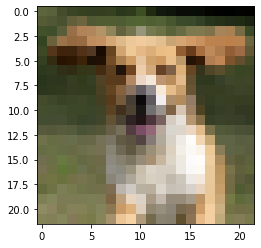

In [85]:
im6 = im4.resize([22,22])
imshow(im6)

### I'm compressing the image to try to eliminate repeating rgb values.

In [92]:
x6, y6 = get_data(im6)

In [93]:
y6_list = y6.tolist()
y6_list = [tuple(l) for l in y6_list]
seen = set()
for x in y6_list:
    if x in seen: print(x)
    seen.add(x)

(53, 61, 34)
(102, 109, 69)
(124, 126, 85)


In [94]:
def make_reverse_model():
    model = Sequential()
    model.add(Dense(3, activation='relu', input_shape=(3,)))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(2))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

m6 = make_reverse_model()

In [103]:
m6.fit(y6, x6, batch_size=5, epochs=25, verbose=1, validation_data=(y6, x6))

Epoch 1/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0845 - val_loss: 0.0841
Epoch 2/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0845 - val_loss: 0.0842
Epoch 3/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0841 - val_loss: 0.0831
Epoch 4/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0844 - val_loss: 0.0841
Epoch 5/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0846 - val_loss: 0.0834
Epoch 6/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0843 - val_loss: 0.0831
Epoch 7/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0845 - val_loss: 0.0837
Epoch 8/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0853 - val_loss: 0.0835
Epoch 9/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0843 - val_loss: 0.0850
Epoch 10/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0839 - val_loss: 0.0831
Epoch 11/25
97/97 [

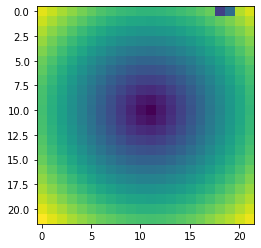

In [130]:
from math import hypot
def generate_reverse_image(model, x, width, height):
    img = Image.new("L", [width, height])
    pixels = img.load()
    y_pred = model.predict(x)
    for y in range(height):
        for x in range(width):
            idx = x + y * width
            c_val = 256 * hypot(y_pred[idx][0]-(x/float(width)), y_pred[idx][1]-(y/float(height)))#/32
            pixels[x, y] = int(c_val)
    return img

img = generate_reverse_image(m6, y6, im6.width, im6.height)
imshow(img)

### It looks like something went wrong but I can't figure out what. I think it's something to do with there still being those repeated rgb values.

In [109]:
m6.predict(y6)

array([[ 0.49049234,  0.45872626],
       [ 0.49049234,  0.45872626],
       [ 0.49049234,  0.45872626],
       [ 0.49049234,  0.45872626],
       [ 0.49049234,  0.45872626],
       [ 0.49049234,  0.45872626],
       [ 0.49049234,  0.45872626],
       [ 0.49049234,  0.45872626],
       [ 0.49049234,  0.45872626],
       [ 0.49049234,  0.45872626],
       [ 0.49049234,  0.45872626],
       [ 0.49049234,  0.45872626],
       [ 0.49049234,  0.45872626],
       [ 0.49049234,  0.45872626],
       [ 0.49049234,  0.45872626],
       [ 0.49049234,  0.45872626],
       [ 0.49049234,  0.45872626],
       [ 0.49049234,  0.45872626],
       [ 0.6926718 ,  0.06475876],
       [ 1.0629687 , -0.16141808],
       [ 0.49049234,  0.45872626],
       [ 0.49049234,  0.45872626],
       [ 0.49049234,  0.45872626],
       [ 0.49049234,  0.45872626],
       [ 0.49049234,  0.45872626],
       [ 0.49049234,  0.45872626],
       [ 0.49049234,  0.45872626],
       [ 0.49049234,  0.45872626],
       [ 0.49049234,

In [113]:
y6

array([[ 93, 101,  62],
       [ 89,  96,  59],
       [ 68,  76,  44],
       ...,
       [125, 125,  81],
       [132, 124,  86],
       [122, 121,  78]])

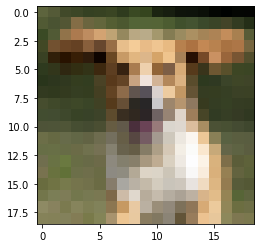

In [127]:
#im7 = im4.resize([19,19])
#x7, y7 = get_data(im7)
y7[17] = [4,6,4]
y7_list = y7.tolist()
y7_list = [tuple(l) for l in y7_list]
seen = set()
for x in y7_list:
    if x in seen: print(x, len(seen))
    seen.add(x)
imshow(im7)

### For this attempt I changed the one repeated value in order to eliminate all of them.

In [128]:
m7 = make_reverse_model()

In [129]:
m7.fit(y7, x7, batch_size=5, epochs=25, verbose=1, validation_data=(y7, x7))

Epoch 1/25
73/73 [==============================] - 0s 3ms/step - loss: 0.2715 - val_loss: 0.1008
Epoch 2/25
73/73 [==============================] - 0s 1ms/step - loss: 0.0828 - val_loss: 0.0763
Epoch 3/25
73/73 [==============================] - 0s 1ms/step - loss: 0.0763 - val_loss: 0.0740
Epoch 4/25
73/73 [==============================] - 0s 1ms/step - loss: 0.0744 - val_loss: 0.0760
Epoch 5/25
73/73 [==============================] - 0s 2ms/step - loss: 0.0747 - val_loss: 0.0733
Epoch 6/25
73/73 [==============================] - 0s 1ms/step - loss: 0.0739 - val_loss: 0.0724
Epoch 7/25
73/73 [==============================] - 0s 1ms/step - loss: 0.0729 - val_loss: 0.0717
Epoch 8/25
73/73 [==============================] - 0s 1ms/step - loss: 0.0720 - val_loss: 0.0706
Epoch 9/25
73/73 [==============================] - 0s 1ms/step - loss: 0.0716 - val_loss: 0.0697
Epoch 10/25
73/73 [==============================] - 0s 1ms/step - loss: 0.0710 - val_loss: 0.0694
Epoch 11/25
73/73 [

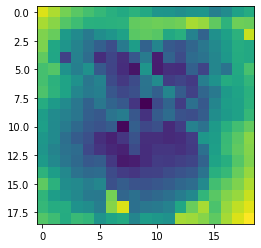

In [131]:
img = generate_reverse_image(m7, y7, im7.width, im7.height)
imshow(img)

### Ah that looks better. In the image above, the darker the pixel, the further the xy coordinates that it guessed for the rgb values at that pixel are from the actual xy coordinates.

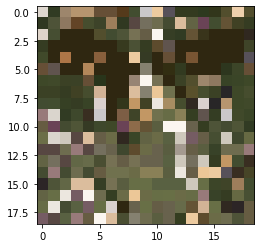

In [142]:
def generate_mixed_image(model, i, width, height):
    img = Image.new("RGB", [width, height])
    pixels = img.load()
    y_pred = model.predict(i)
    for y in range(height):
        for x in range(width):
            idx = x + y * width
            r, g, b = i[int(round(y_pred[idx][0]*width + y_pred[idx][1]*height*width))]
            pixels[x, y] = (int(r), int(g), int(b))
    return img

img = generate_mixed_image(m7, y7, im7.width, im7.height)
imshow(img)

### The image above shows the pixel at the xy coordinates that the model guessed for the rgb values of that point. You can see that the ears are all the same brown, so I'm assuming the model thought that all the rgb values in the ears were similar to one specific xy value with that shade of brown.

In [144]:
m7.predict(y7)[0][0]

0.38620695